#  Pandas & Chess: An Analysis of the Lichess Dataset

**Authors**

<mohammed.kheir@>


<olusegunemmanuel.ajibola@>



**Table of Contents**

1. [Introduction](#Introduction)

2. [Methodology](#Methodology)

3. [Data Analysis and Results](#Data-Analysis-and-Results)
    * [Preprocessing](#Preprocessing)
    * [Data Analysis](#Data-Analysis)
        * [Research Questions](#Research-Questions)

4. [Conclusion](#Conclusion)

5. [References](#References)

# Introduction


Chess is a board game played between two players. The history of chess dates as far back as the 20th century. It is one of the oldest advanced strategy games known. A typical chessboard is usually square in shape, with an alternating pattern of squares in two colours (formally a light and dark colour). A chess piece, or chessman, is any of the six types of movable objects used on a chessboard to play the game of chess. They are usually in a pair, white - for the white player, and black - for the black player. In a standard game, each of the two players begins with the following sixteen pieces:

* 1 king
* 1 queen
* 2 rooks
* 2 bishops
* 2 knights
* 8 pawns

|![chessboard.png](chessboard.png)
|--
|__A Standard Chessboard with 16 Pieces per Player__

The standard contemporary way to record moves and refer to the squares of the chessboard is algebraic chess notation The files are identified by the letters a to h, from left to right from the white player's point of view, and the ranks by the numbers 1 to 8, with 1 being closest to the white player. Each square on the board is identified by a unique coordinate pairing, from a1 to h8.

As a result of advancement in (gaming) technology, software and applications have been developed to ensure that people irrespective of their location can compete in the game of chess. Lichess.org, established in 2010 as an open source site where players play chess for free. Users play more than five million games every day. They can play online chess anonymously and optionally register an account to play rated games. It is one of the most popular chess websites in the world. Other platforms (websites) where users can play chess include: Chess.com, chess24, Internet Chess Club (ICC), Free Internet Chess Server (FICS), Playchess.com, e.t.c. There exists several mobile applications that serves the same purpose of playing chess.

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. It works with tabular data in similar but unique way as one would with SQL or an Excel spreadsheet.

In this project, we use the pandas library to analyze the Lichess dataset.

# Methodology

The data for the project was available in a comma-separated value (csv) format. We take the chart as given below to conduct our analysis.

|![analysisprocess.png](analysisprocess.png)
|-- 
|__Data Handling Methodology__

**Preprocessing**: the goal of this step is to 

-  clean up the raw dataset (e.g., removing rows with null or corrupted values) and 

- reshape the dataset to make the analysis straightforward (e.g., removing useless columns or changing dataset organization). 

The output of this process was saved in a csv file containing the cleaned data.

**Analysis**: the goal of this step is to 

- extract knowledge from clean dataset. Specifically, you are asked to generate statistics (e.g., mean, median, sums) and graphs (e.g., bar graph, histogram plots, piecharts) using python (and Data Science libraries). 

The computed statistics are saved in csv files, while each produced graph is stored in an individual file in pdf and png formats. For the sole purpose of this report (in this notebook), we will not be saving the statistics and graphs since they can be readily seen on the notebook itself. Kindly refer to the __.py__ scripts for graphs and statistics outputs.

Aside from the preprocessing and analysis part which are done in this report (via a jupyter notebook), we went ahead to embed them as individual **.py** files (using Python class and function commands) which can be run only once to generate all graphs and statistics.

In particular, we have the following four listed scripts:

1. preprocessing_chess.py – the script to generate clean dataset(s). 
2. util_chess.py – consists of classes and functions which takes the clean dataset as input and sets the ground for the analysis to be conducted alongside the desired statistics and graphs to be generated.
3.  analysis_chess.py – the script to save the statistics and graphs using the class available in the util_chess.py script.
4. workflow_chess.py – the script to run whole process. 

The scripts run as given in the order above. They can be found in the zip file attached in the project folder.

# Data Analysis and Results

## Preprocessing

We commence this process by importing the needed library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import os
%matplotlib inline
plt.rcParams["figure.dpi"] = 72

# os.makedirs("results")
# os.makedirs("data")

# sns.set_style('whitegrid')
# sns.set(palette='Paired')

In [2]:
chess = pd.read_csv('games.csv')

In [3]:
chess.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


From the above, we have that out data consists of 16 columns of various datatypes - integers, booleans and strings.

In [5]:
chess.shape

(20058, 16)

The data consists of 20,058 rows and 16 columns (including the index).

We now remove some columns which are of no interest to us. This includes: the moves made by the player, Opening Eco (Standardised Code for any given opening, this is a repitition of `opening_name`), the time the player made a last move and created  an account.

In [6]:
chess.drop(labels = ['moves','opening_eco','last_move_at','created_at'] , axis='columns', inplace=True)

Our chess dataset now consists of 12 columns from the earlier 16.

In [7]:
chess.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,Philidor Defense,5


In [8]:
chess.shape

(20058, 12)

In [9]:
chess.isna().any()

id                False
rated             False
turns             False
victory_status    False
winner            False
increment_code    False
white_id          False
white_rating      False
black_id          False
black_rating      False
opening_name      False
opening_ply       False
dtype: bool

The above shows that none of the column in the dataset has missing values

In [10]:
chess.rename( columns=  {'opening_ply':'Number of moves in the opening phase'}, inplace=True )

In [11]:
chess.head(1)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_name,Number of moves in the opening phase
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,Slav Defense: Exchange Variation,5


We now have a clead dataset which we can work with and can proceed with saving it.

In [12]:
chess.to_csv('data/clean_chessdata.csv', index=False)

As noted earlier, to avoid a lot of repitition, we shall not be saving the statistics generated in this notebook/report.

## Data Analysis

### Research Questions

The following are the research questions that we attempt to provide an answer for using our data analysis:

1. know how the games played in the dataset ended,
2. the player that is more likely to win a game? White or black?
3. understand which opening name is more used,
4. investigate the type/distribution of match outcomes that are expected with the top 20 opening names used,
5. identify how the top opening names used affects whether a white or black player wins the game, or the game ends in a draw,
6. look into the players that patronizes Lichess.org the most by the number of matches played,
7. study the top players with the most victories in the dataset,
8. examine the distribution of the white player i.e `white_rating` and black player i.e`black_rating`.

We want to have a quick description of the entire dataset for the numeric variables.

In [13]:
desc = round(chess.describe(),2)
desc

,turns,white_rating,black_rating,Number of moves in the opening phase
count,20058.00,20058.00,20058.00,20058.00
mean,60.47,1596.63,1588.83,4.82
std,33.57,291.25,291.04,2.80
min,1.00,784.00,789.00,1.00
25%,37.00,1398.00,1391.00,3.00
50%,55.00,1567.00,1562.00,4.00
75%,79.00,1793.00,1784.00,6.00
max,349.00,2700.00,2723.00,28.00


In [14]:
desc.drop(labels = ['Number of moves in the opening phase'] , axis='columns', inplace=True)
desc

,turns,white_rating,black_rating
count,20058.00,20058.00,20058.00
mean,60.47,1596.63,1588.83
std,33.57,291.25,291.04
min,1.00,784.00,789.00
25%,37.00,1398.00,1391.00
50%,55.00,1567.00,1562.00
75%,79.00,1793.00,1784.00
max,349.00,2700.00,2723.00


From the above, observing the `white_rating` and `black_rating` columns we can see that the statistics are almost the same. This is quite understandable as different player might either be a white piece or a black piece in consecutive games.

In every game, we usually want  to know how the games ended. We now group our data according to the `victory_status` column.

In [15]:
outcome = chess.groupby(['victory_status'])[['id']].count()
outcome = outcome.sort_values('id')
outcome.rename(columns={'id': 'Total'}, inplace = True)
outcome

,Total
victory_status,
draw,906
outoftime,1680
mate,6325
resign,11147


In [16]:
outcome.loc["SUM"] = outcome["Total"].sum()
outcome

,Total
victory_status,
draw,906
outoftime,1680
mate,6325
resign,11147
SUM,20058


In [17]:
print(outcome.loc['SUM'])
print('---------------\n')
print(outcome.loc['SUM']['Total'])

Total    20058
Name: SUM, dtype: int64
---------------

20058


We can save the output using the code below:

In [18]:
# outcome.to_csv('results/outcome.csv', index=False)

In [19]:
outcome_chart = outcome.iloc[:-1].reset_index()
outcome_chart

,victory_status,Total
0,draw,906
1,outoftime,1680
2,mate,6325
3,resign,11147


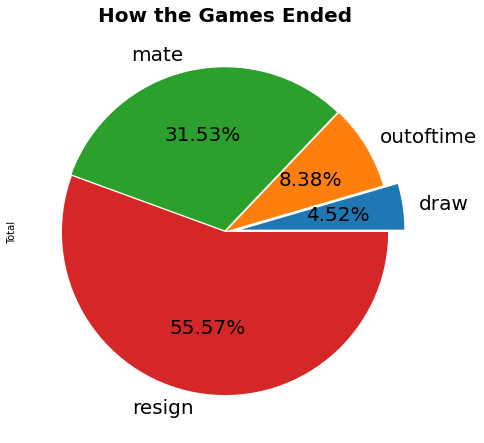

In [20]:
outcome.iloc[:-1].reset_index().plot(kind='pie', y = 'Total', autopct='%1.2f%%', 
 startangle=0, shadow=False, labels=outcome.iloc[:-1].reset_index()['victory_status'], explode= [.1 , .01, .01 , 0],  
                                     legend = False, fontsize=20, figsize=(7.5,7.5))
plt.title("How the Games Ended", fontweight='bold',fontsize=20)
plt.tick_params(labelsize=20)
plt.show()
# plt.savefig('outcome_piechart.pdf')

Who is more likely to win a game? White or black?

In [21]:
winner_colour = chess.groupby('winner')[['id']].count()
winner_colour.rename(columns={'id': 'Number of Victories'}, inplace = True)
winner_colour

,Number of Victories
winner,
black,9107
draw,950
white,10001


In [22]:
winner_colour['Percentage of Victories'] = (winner_colour['Number of Victories'] / winner_colour['Number of Victories'].sum()) * 100
winner_colour['Percentage of Victories']=winner_colour['Percentage of Victories'].map(lambda perc: round(perc, 2))
winner_colour.reset_index(inplace=True)
winner_colour

,winner,Number of Victories,Percentage of Victories
0,black,9107,45.40
1,draw,950,4.74
2,white,10001,49.86


In [23]:
# winner_colour.to_csv('winner_colour.csv', index=False)

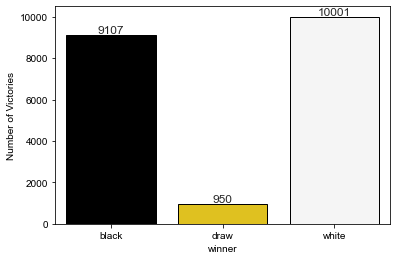

In [24]:
ax = sns.barplot(y = 'Number of Victories', x = 'winner',  data = winner_colour, palette=[ '#000000',"#FFD700" ,'#F5F5F5'], edgecolor='black')
sns.set(rc={'figure.figsize':(10,10)})
ax.bar_label(ax.containers[0])
# plt.tick_params(labelsize=20)
# plt.savefig('winner_colour.pdf')
plt.show()

From the chart above and the earlier statistics, we can see that the color piece used does not have much bearing on the match outcome as the difference is quite small. Furthermore, if we look at the average rating of the black and white players as given in `desc`, we can see the reason why this outcome is tenable as players are constantly swapping between being a white or a black piece while playing the game.

We check which opening is used the most

In [25]:
opening = chess.groupby(['opening_name'])[['id']].count().sort_values('id', ascending = False).reset_index()
opening.rename(columns = {'id':'count'}, inplace= True)
opening

,opening_name,count
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
...,...,...
1472,Queen's Gambit Accepted: Bogoljubov Defense,1
1473,Queen's Gambit Accepted: Central Variation | ...,1
1474,Queen's Gambit Accepted: Central Variation | ...,1
1475,Queen's Gambit Accepted: Deferred Variation,1


In [135]:
chess.head(1)
k = chess['opening_name'].value_counts()
k = pd.DataFrame(k)
k
# k.reset_index()
y = k.sort_values(by = 'opening_name')
y.head(30)

,opening_name
Sicilian Defense: Najdorf Variation | Polugaevsky Variation,1
Semi-Slav Defense: Marshall Gambit | Main Line,1
Italian Game: Scotch Gambit,1
Amazon Attack: Siberian Attack,1
English Opening: King's English Variation | Taimanov Variation,1
Ruy Lopez: Closed Variations | Pilnik Variation,1
Dutch Defense: Semi-Leningrad Variation,1
Rubinstein Opening,1
Caro-Kann Defense: von Hennig Gambit,1
Caro-Kann Defense: Karpov Variation | Tiviakov-Fischer Attack,1


In [109]:
scotch = chess[chess['opening_name'] == 'Scotch Game']
len(scotch[scotch['winner']=='white'])/len(scotch)*100

53.50553505535055

In [26]:
top_opening = opening.iloc[:20]
top_opening

,opening_name,count
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


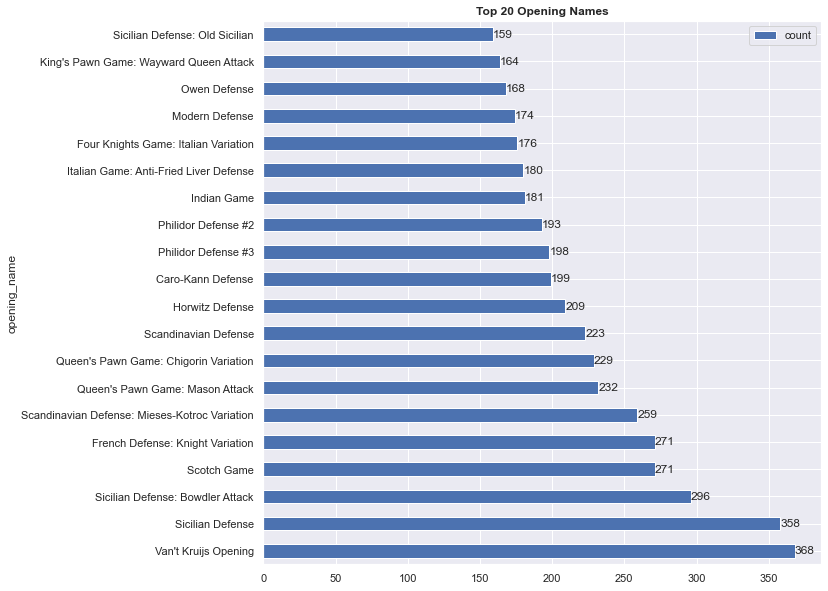

In [27]:
ax = top_opening.plot.barh(x = 'opening_name', y = 'count')
ax.bar_label(ax.containers[0])
plt.title('Top 20 Opening Names', fontweight = 'bold')
# plt.tick_params(labelsize=15)
plt.show()

We now investigate the type of match outcomes that are expected with these top 20 openings

In [28]:
opening_name_outcome = chess.groupby(['opening_name','victory_status'])[['id']].count().sort_values('opening_name', ascending = True)
opening_name_outcome.rename(columns = {'id':'count'}, inplace= True)
opening_name_outcome

count
opening_name                    victory_status       
Alekhine Defense                draw                2
                                mate               17
                                outoftime           3
                                resign             24
Alekhine Defense #2             draw                1
...                                               ...
Zukertort Opening: The Walrus   mate                1
Zukertort Opening: Vos Gambit   mate                1
                                resign              1
                                draw                1
Zukertort Opening: Wade Defense mate                1

[3124 rows x 1 columns]

In [29]:
opening_name_outcome.head(15)

count
opening_name                                       victory_status       
Alekhine Defense                                   draw                2
                                                   mate               17
                                                   outoftime           3
                                                   resign             24
Alekhine Defense #2                                draw                1
                                                   mate                1
                                                   resign              1
Alekhine Defense #3                                resign              1
Alekhine Defense: Balogh Variation                 mate                1
Alekhine Defense: Brooklyn Variation               mate                2
Alekhine Defense: Exchange Variation               resign              3
                                                   mate                1
Alekhine Defense: Four Pawns Attack                mate                2
Alekhine Defense: Four Pawns Attack |  6...Nc6     resign              1
Alekhine Defense: Four Pawns Attack |  Fianchet... mate                1

 From the top 20 openings, we go deeper to investigate by visualizing the type of match outcomes that are expected with the top 6 opening moves.

In [30]:
top_opening_6 = top_opening.iloc[:6]
top_opening_6

,opening_name,count
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259


In [31]:
top_opening_6['opening_name'].to_numpy()

array(["Van't Kruijs Opening", 'Sicilian Defense',
       'Sicilian Defense: Bowdler Attack', 'Scotch Game',
       'French Defense: Knight Variation',
       'Scandinavian Defense: Mieses-Kotroc Variation'], dtype=object)

In [32]:
aggregate_opening_outcome =  opening_name_outcome.loc[top_opening_6['opening_name'].to_numpy()]
aggregate_opening_outcome

count
opening_name                                  victory_status       
Van't Kruijs Opening                          draw               16
                                              mate              154
                                              outoftime          27
                                              resign            171
Sicilian Defense                              draw               12
                                              mate              110
                                              outoftime          32
                                              resign            204
Sicilian Defense: Bowdler Attack              mate              100
                                              outoftime          24
                                              draw               12
                                              resign            160
Scotch Game                                   outoftime          21
                                              resign            166
                                              draw               10
                                              mate               74
French Defense: Knight Variation              draw               15
                                              mate               84
                                              outoftime          14
                                              resign            158
Scandinavian Defense: Mieses-Kotroc Variation resign            134
                                              outoftime          16
                                              mate              103
                                              draw                6

In [33]:
aggregate_opening_outcome = aggregate_opening_outcome.sort_values(by = ["victory_status", "count"], ascending =  False)
aggregate_opening_outcome

,,count
opening_name,victory_status,
Sicilian Defense,resign,204
Van't Kruijs Opening,resign,171
Scotch Game,resign,166
Sicilian Defense: Bowdler Attack,resign,160
French Defense: Knight Variation,resign,158
Scandinavian Defense: Mieses-Kotroc Variation,resign,134
Sicilian Defense,outoftime,32
Van't Kruijs Opening,outoftime,27
Sicilian Defense: Bowdler Attack,outoftime,24


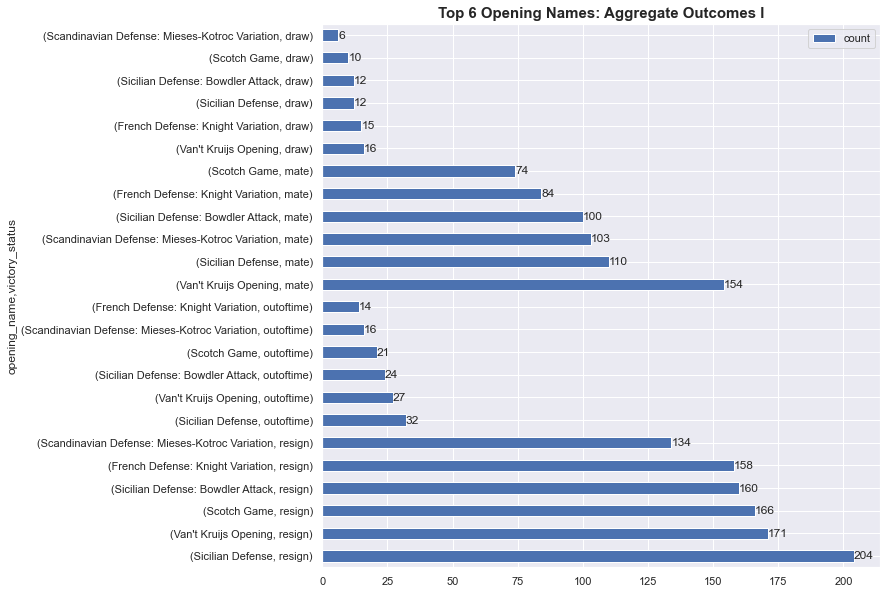

In [34]:
ax = aggregate_opening_outcome.plot.barh(rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 6 Opening Names: Aggregate Outcomes I', fontweight='bold',fontsize=15)
# plt.tick_params(labelsize=15)
plt.show()

The above graph gives an aggregate of the opening moves and the match outcomes that follows. We now proceed by seperating these outcomes.

In [35]:
# ax = aggregate_opening_outcome.plot.barh(rot=0)
aggregate_opening_outcome = aggregate_opening_outcome.reset_index()
aggregate_opening_outcome

,opening_name,victory_status,count
0,Sicilian Defense,resign,204
1,Van't Kruijs Opening,resign,171
2,Scotch Game,resign,166
3,Sicilian Defense: Bowdler Attack,resign,160
4,French Defense: Knight Variation,resign,158
5,Scandinavian Defense: Mieses-Kotroc Variation,resign,134
6,Sicilian Defense,outoftime,32
7,Van't Kruijs Opening,outoftime,27
8,Sicilian Defense: Bowdler Attack,outoftime,24
9,Scotch Game,outoftime,21


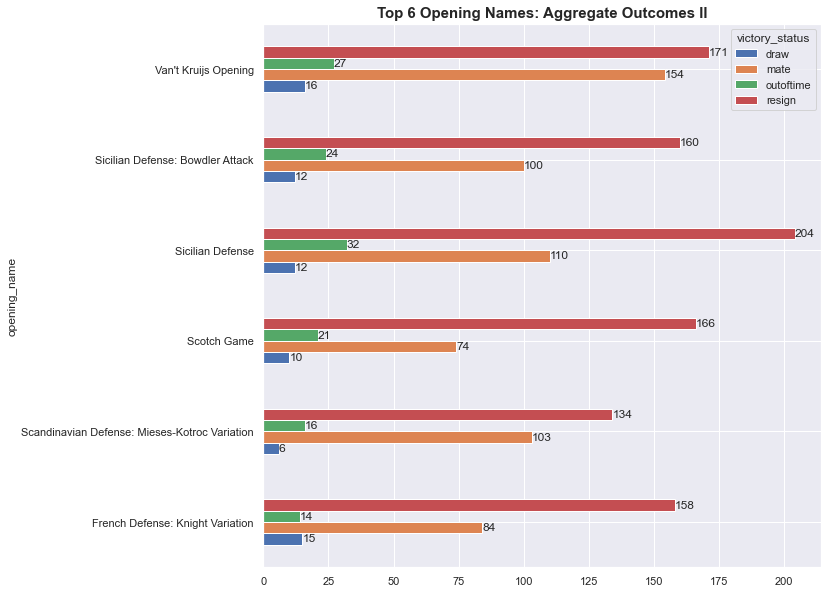

In [36]:
ax = aggregate_opening_outcome.pivot(index ='opening_name', columns = 'victory_status' , values='count').plot(kind='barh')
plt.title('Top 6 Opening Names: Aggregate Outcomes II', fontweight='bold',fontsize=15)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
# plt.tick_params(labelsize=15)
plt.show()

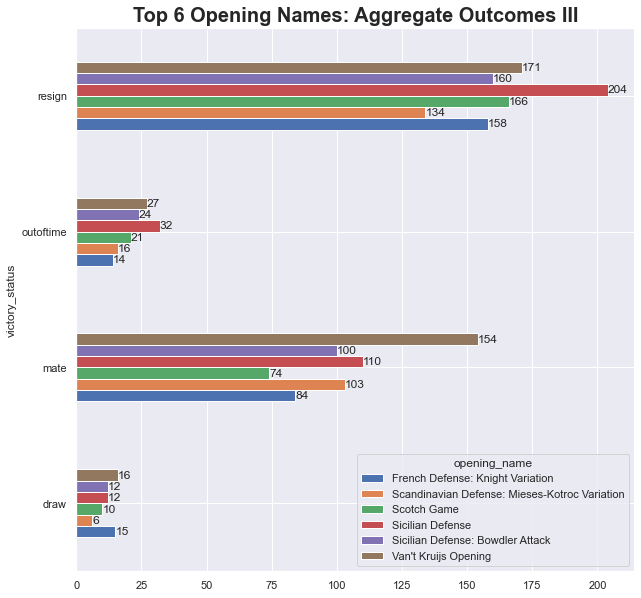

In [37]:
ax = aggregate_opening_outcome.pivot(index ='victory_status', columns = 'opening_name' , values='count').plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 6 Opening Names: Aggregate Outcomes III', fontweight='bold',fontsize=20)
# plt.tick_params(labelsize=15)
plt.show()

The two graphs above provides us with a much more clearer view of the match outcomes grouped by `opening_name` and `victory_status`. It is evident that players who use `Van't Kruijs Opening` are more likely to win a game, whereas using `Sicilian Defense` is tantamount to a defeat.

We do the same analysis as done before, but this time, we determine how the opening move and the colour piece decides who wins a game for the top 10 opening name.

In [38]:
opening_name_winner = chess.groupby(['opening_name','winner'])[['id']].count()
opening_name_winner.rename(columns = {'id':'count'}, inplace= True)
opening_name_winner

count
opening_name                    winner       
Alekhine Defense                black      21
                                draw        2
                                white      23
Alekhine Defense #2             black       1
                                draw        1
...                                       ...
Zukertort Opening: The Walrus   white       1
Zukertort Opening: Vos Gambit   black       1
                                draw        1
                                white       1
Zukertort Opening: Wade Defense black       1

[2739 rows x 1 columns]

In [39]:
top_opening_10 = top_opening.iloc[:10]
top_opening_10

,opening_name,count
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


Which of the top ten opening move will help us achieve victory?

In [40]:
top_opening_10['opening_name'].to_numpy()

array(["Van't Kruijs Opening", 'Sicilian Defense',
       'Sicilian Defense: Bowdler Attack', 'Scotch Game',
       'French Defense: Knight Variation',
       'Scandinavian Defense: Mieses-Kotroc Variation',
       "Queen's Pawn Game: Mason Attack",
       "Queen's Pawn Game: Chigorin Variation", 'Scandinavian Defense',
       'Horwitz Defense'], dtype=object)

In [41]:
aggregate_opening_name_winner =  opening_name_winner.loc[top_opening_10['opening_name'].to_numpy()]

aggregate_opening_name_winner

count
opening_name                                  winner       
Van't Kruijs Opening                          black     226
                                              draw       16
                                              white     126
Sicilian Defense                              black     194
                                              draw       15
                                              white     149
Sicilian Defense: Bowdler Attack              black     164
                                              draw       13
                                              white     119
Scotch Game                                   black     115
                                              draw       11
                                              white     145
French Defense: Knight Variation              black     121
                                              draw       15
                                              white     135
Scandinavian Defense: Mieses-Kotroc Variation black      89
                                              draw        6
                                              white     164
Queen's Pawn Game: Mason Attack               black     103
                                              draw       13
                                              white     116
Queen's Pawn Game: Chigorin Variation         black     109
                                              draw        8
                                              white     112
Scandinavian Defense                          black     123
                                              draw       10
                                              white      90
Horwitz Defense                               black      94
                                              draw        5
                                              white     110

In [42]:
aggregate_opening_name_winner = aggregate_opening_name_winner.sort_values(by = ["winner", "count"], ascending =  False)
aggregate_opening_name_winner = aggregate_opening_name_winner.reset_index()
aggregate_opening_name_winner

,opening_name,winner,count
0,Scandinavian Defense: Mieses-Kotroc Variation,white,164
1,Sicilian Defense,white,149
2,Scotch Game,white,145
3,French Defense: Knight Variation,white,135
4,Van't Kruijs Opening,white,126
5,Sicilian Defense: Bowdler Attack,white,119
6,Queen's Pawn Game: Mason Attack,white,116
7,Queen's Pawn Game: Chigorin Variation,white,112
8,Horwitz Defense,white,110
9,Scandinavian Defense,white,90


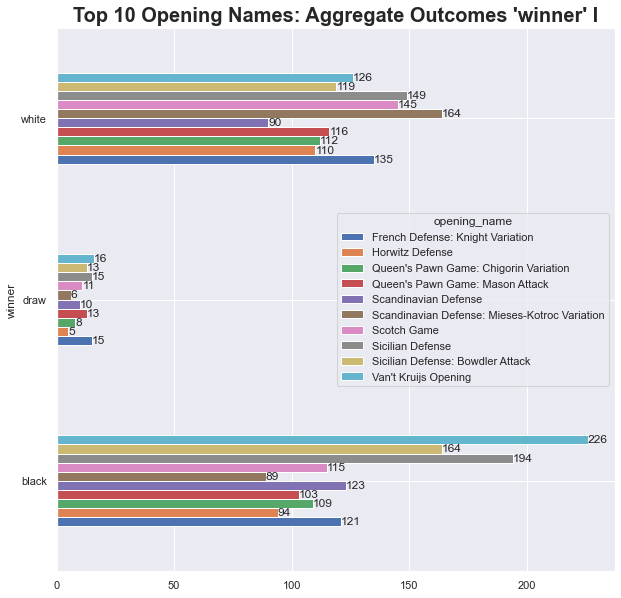

In [43]:
ax = aggregate_opening_name_winner.pivot(index ='winner', columns = 'opening_name' , values='count').plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 10 Opening Names: Aggregate Outcomes 'winner' I", fontweight='bold',fontsize=20)
# plt.tick_params(labelsize=15)
plt.show()

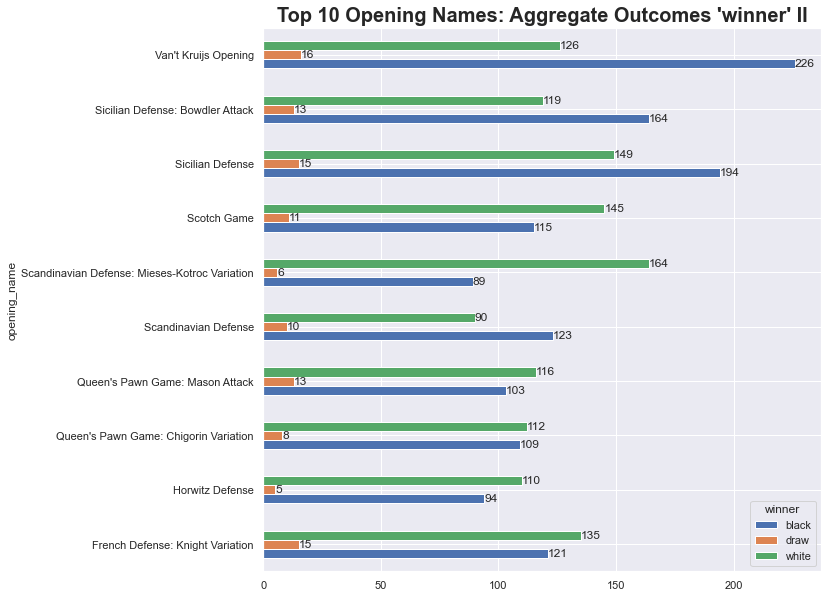

In [44]:
ax = aggregate_opening_name_winner.pivot(index ='opening_name', columns = 'winner' , values='count').plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 10 Opening Names: Aggregate Outcomes 'winner' II" , fontweight='bold',fontsize=20)
# plt.tick_params(labelsize=15)
plt.show()

Looking at the two graphs as given above, we note the following:
* using a black piece with the `Van't Kruijs Opening` assures a player of a higher chance of victory, whereas,
* the `Scandinavian Defense: Mieses-Kotroc Variation` opening gives the white piece a higher chance of victory.

We look at the unique players that patronizes Lichess. We check the frequent players who play games with Lichess.

In [45]:
white = list(chess['white_id'].to_numpy())
black = list(chess['black_id'].to_numpy())
print(len(white + black ))
players = white + black
# players

40116


In [46]:
players = pd.Series(players).value_counts()
players = players.to_frame().reset_index()
players

,index,0
0,taranga,154
1,a_p_t_e_m_u_u,96
2,vladimir-kramnik-1,96
3,king5891,78
4,saviter,76
...,...,...
15630,raoqwya,1
15631,perdanahitam1042,1
15632,cincinnatus99,1
15633,saidtugcu,1


In [47]:
players.rename(columns = { 0:'matches played','index':'Player ID'}, inplace=True)
# chess.rename( columns=  {'opening_ply':'Number of moves in the opening phase'}, inplace=True )

In [48]:
players[:20]

,Player ID,matches played
0,taranga,154
1,a_p_t_e_m_u_u,96
2,vladimir-kramnik-1,96
3,king5891,78
4,saviter,76
5,anakgreget,74
6,ducksandcats,69
7,chess-brahs,65
8,mastersalomon,65
9,artem555,64


We also go futher to check the star players in the dataset. Here, we refer to the players with the most victories.

In [49]:
topWhitePlayers = chess['white_id'][chess['winner'] == 'white'].value_counts()
topWhitePlayers

taranga               34
ssf7                  29
hassan1365416         28
a_p_t_e_m_u_u         25
vladimir-kramnik-1    22
                      ..
angelkiss              1
morenobh               1
szupfer                1
andradedavi            1
marcodisogno           1
Name: white_id, Length: 5437, dtype: int64

In [50]:
topBlackPlayers = chess['black_id'][chess['winner'] == 'black'].value_counts()
topBlackPlayers

taranga               38
ducksandcats          29
vladimir-kramnik-1    28
chesscarl             27
docboss               25
                      ..
serjjant               1
thesatantango          1
jrodneystar            1
dimehola               1
ffbob                  1
Name: black_id, Length: 4943, dtype: int64

In [51]:
stars = pd.DataFrame(topWhitePlayers.append(topBlackPlayers), columns = ['Matches_Won'])
stars.sort_values(by = ['Matches_Won'], ascending = False, inplace = True)
stars['Player ID'] = stars.index

In [52]:
top_players = stars.groupby('Player ID').sum().reset_index()

In [53]:
top_players.sort_values('Matches_Won', ascending=False, inplace = True)
top_players

,Player ID,Matches_Won
7700,taranga,72
8386,vladimir-kramnik-1,50
24,a_p_t_e_m_u_u,46
1564,chesscarl,45
2314,ducksandcats,43
...,...,...
4301,kingsavage,1
4300,kings77,1
4299,kingrat,1
4298,kingkilleretx,1


In [54]:
top_players[:10]

,Player ID,Matches_Won
7700,taranga,72
8386,vladimir-kramnik-1,50
24,a_p_t_e_m_u_u,46
1564,chesscarl,45
2314,ducksandcats,43
4289,king5891,42
2253,doraemon61,38
480,anakgreget,36
7354,smilsydov,36
7995,tori92,34


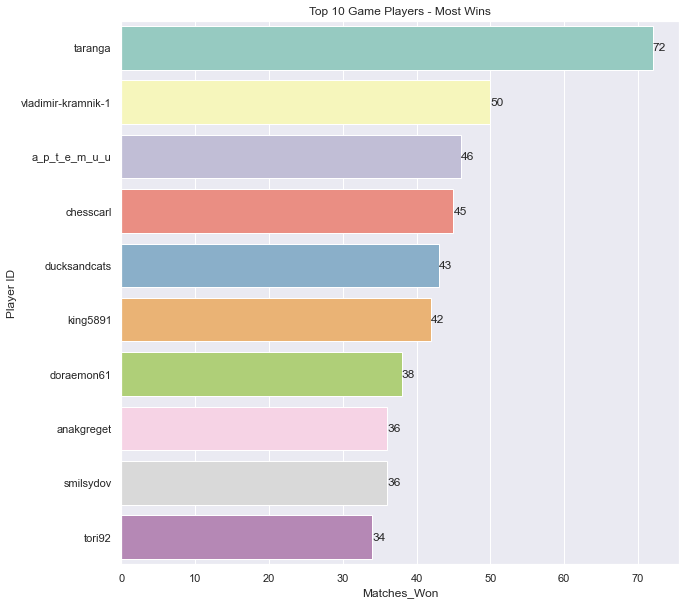

In [55]:
top10_players = top_players.iloc[:10]      
ax = sns.barplot(y = 'Player ID', x = 'Matches_Won', data = top10_players, palette='Set3' )
ax.bar_label(ax.containers[0])    
plt.title('Top 10 Game Players - Most Wins')
plt.show()

From the above, we have the statistics of the top 10 players with the most wins in the dataset.

Distribution of player ratings.

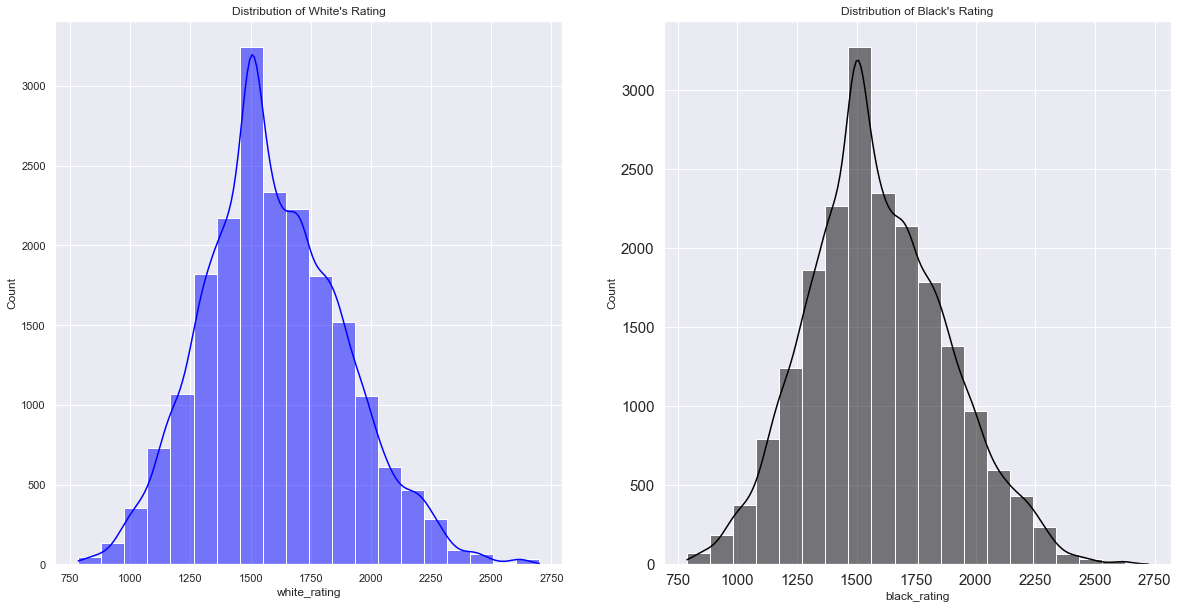

In [56]:
%matplotlib inline


dims = (20, 10)
fig, ax = plt.subplots(1,2,figsize=dims)
#Distribution of white's rating
sns.histplot(chess['white_rating'], bins = 20, ax = ax[0], kde=True, color = 'blue', edgecolor='white')

#Distribution of black's rating
sns.histplot(chess['black_rating'], bins = 20, ax = ax[1], kde=True,color = 'black', edgecolor='white')

ax[0].set(title = "Distribution of White's Rating")
plt.tick_params(labelsize=15)
ax[1].set(title = "Distribution of Black's Rating")
# plt.tick_params(labelsize=15)

plt.show()

The above plot depicts that not much difference exists between the two set of players

# Conclusion

The analysis in this report has taken us through the journey of using pandas for a chess dataset (sourced from Lichess.org). We have been able to answer all of the [research questions](#Research-Questions) provided earlier and showing some important graphs as well.

# References

* [Wikipedia](https://en.wikipedia.org/wiki/Chess)
* [Kaggle](https://www.kaggle.com/)
* [GitHub](https://github.com/)
* [lichess.org](https://lichess.org/about)
* [Towards Data Science](https://towardsdatascience.com/)
* [GeeksforGeeks](https://www.geeksforgeeks.org/)
* [Stack Overflow](https://stackoverflow.com/)
* [jupyter book](https://jupyterbook.org)